# <font color='blue'>The solution is divided into the following sections:

  - Data understanding and exploration
  - Data cleaning
  - Data preparation
  - Model building and evaluation

#  <font color='green'> STEP 1: Reading and Understanding the Data
 + Importing warnings
 + Importing all the important libraries
 + Importing data using the pandas library
 + Understanding the structure of the data

In [1]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Reading the csv using pandas
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# checking the numbers of rows and columns
cars.shape

(205, 26)

In [8]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
# Checking datatypes 
cars.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

In [13]:
# Checking summary of numeric variables 
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Understanding the Data Dictionary
 + The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [14]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [16]:
# aspiration: An (internal comnbustion) engine property showing
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbo charging (perssurized oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [17]:
# drivewheel: frontwheel, rarewheel or four-wheel drive
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

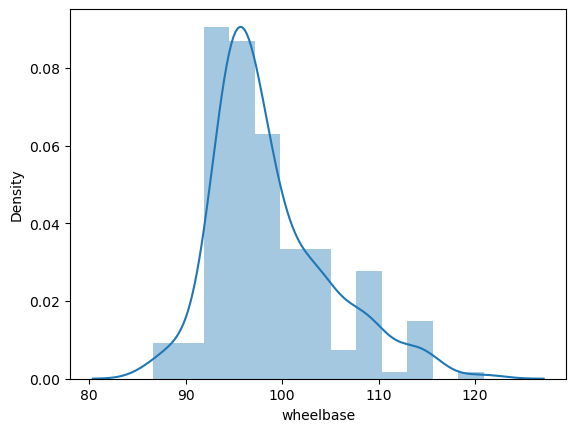

In [18]:
# wheelbase: distance b/w centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

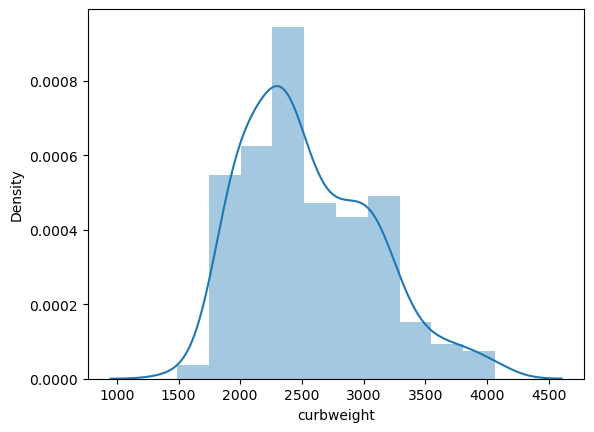

In [19]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

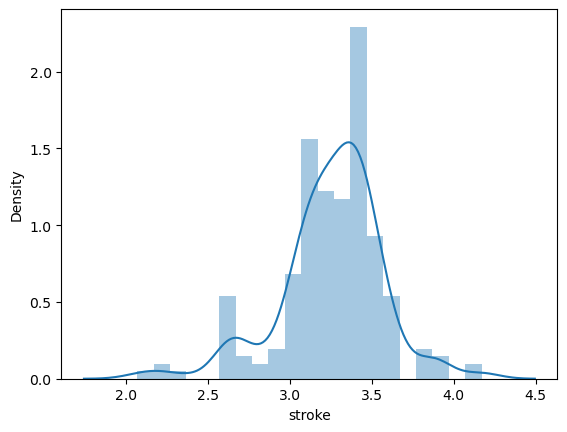

In [20]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

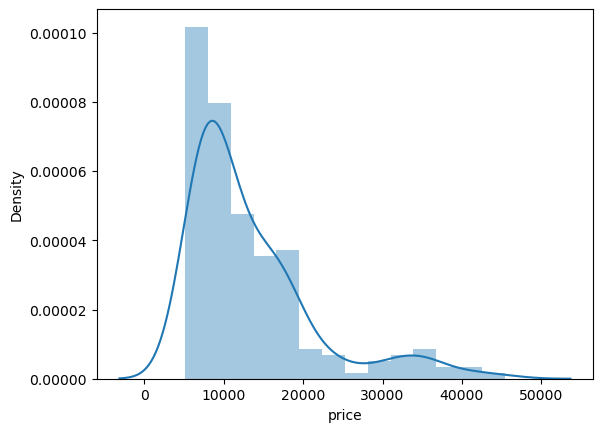

In [21]:
# target variable: price of car
sns.distplot(cars['price'])
plt.show()

# <font color='green'> Step 2 : Data Cleaning and Exploratory Data Analysis
  1. Cleanup carname to consider only company name as the independent variable for model building.
  2. Identify null values.
  3. Replace neccessary values.
  4. Convert dtypes if required.
  5. Explore spread of variables and their influence on price

In [24]:
# Cleaning Car Name to keep only brand(company) name and remove model names 
cars['CarName'] = cars['CarName'].apply(lambda x: x.split(' ', 1)[0])
cars.rename(columns = {'CarName': 'companyname'}, inplace = True)
cars.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [26]:
#checking unique values in company name column
cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## Invalid Values

### There is some inconsistency in the spellings of company names, which needs to be fixed. We need to do the following replacements:

- maxda -> mazda
- Nissan -> nissan
- porcshce -> porsche
- toyouta -> toyota
- vokswagen -> volkswagen
- vw -> volkswagen

In [30]:
#counting number of unique company names
print(cars.companyname.nunique())
print('There are 28 unique companies right now')

28
There are 28 unique companies right now


In [31]:
# Correcting names in company name
cars.companyname = cars.companyname.str.lower()
 
def replace_name(a,b):
    cars.companyname.replace(a, b, inplace = True)
    
replace_name('maxda', 'mazda')
replace_name('Nissan', 'nissan')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')


cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [32]:
# Counting number of unique company names
cars.companyname.nunique()

22

After fixing there are 22 unique companies right now

In [36]:
# look at all values 
cars['companyname'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: companyname, dtype: int64

+ Let's see their company wise popularity (count) and company wise average price



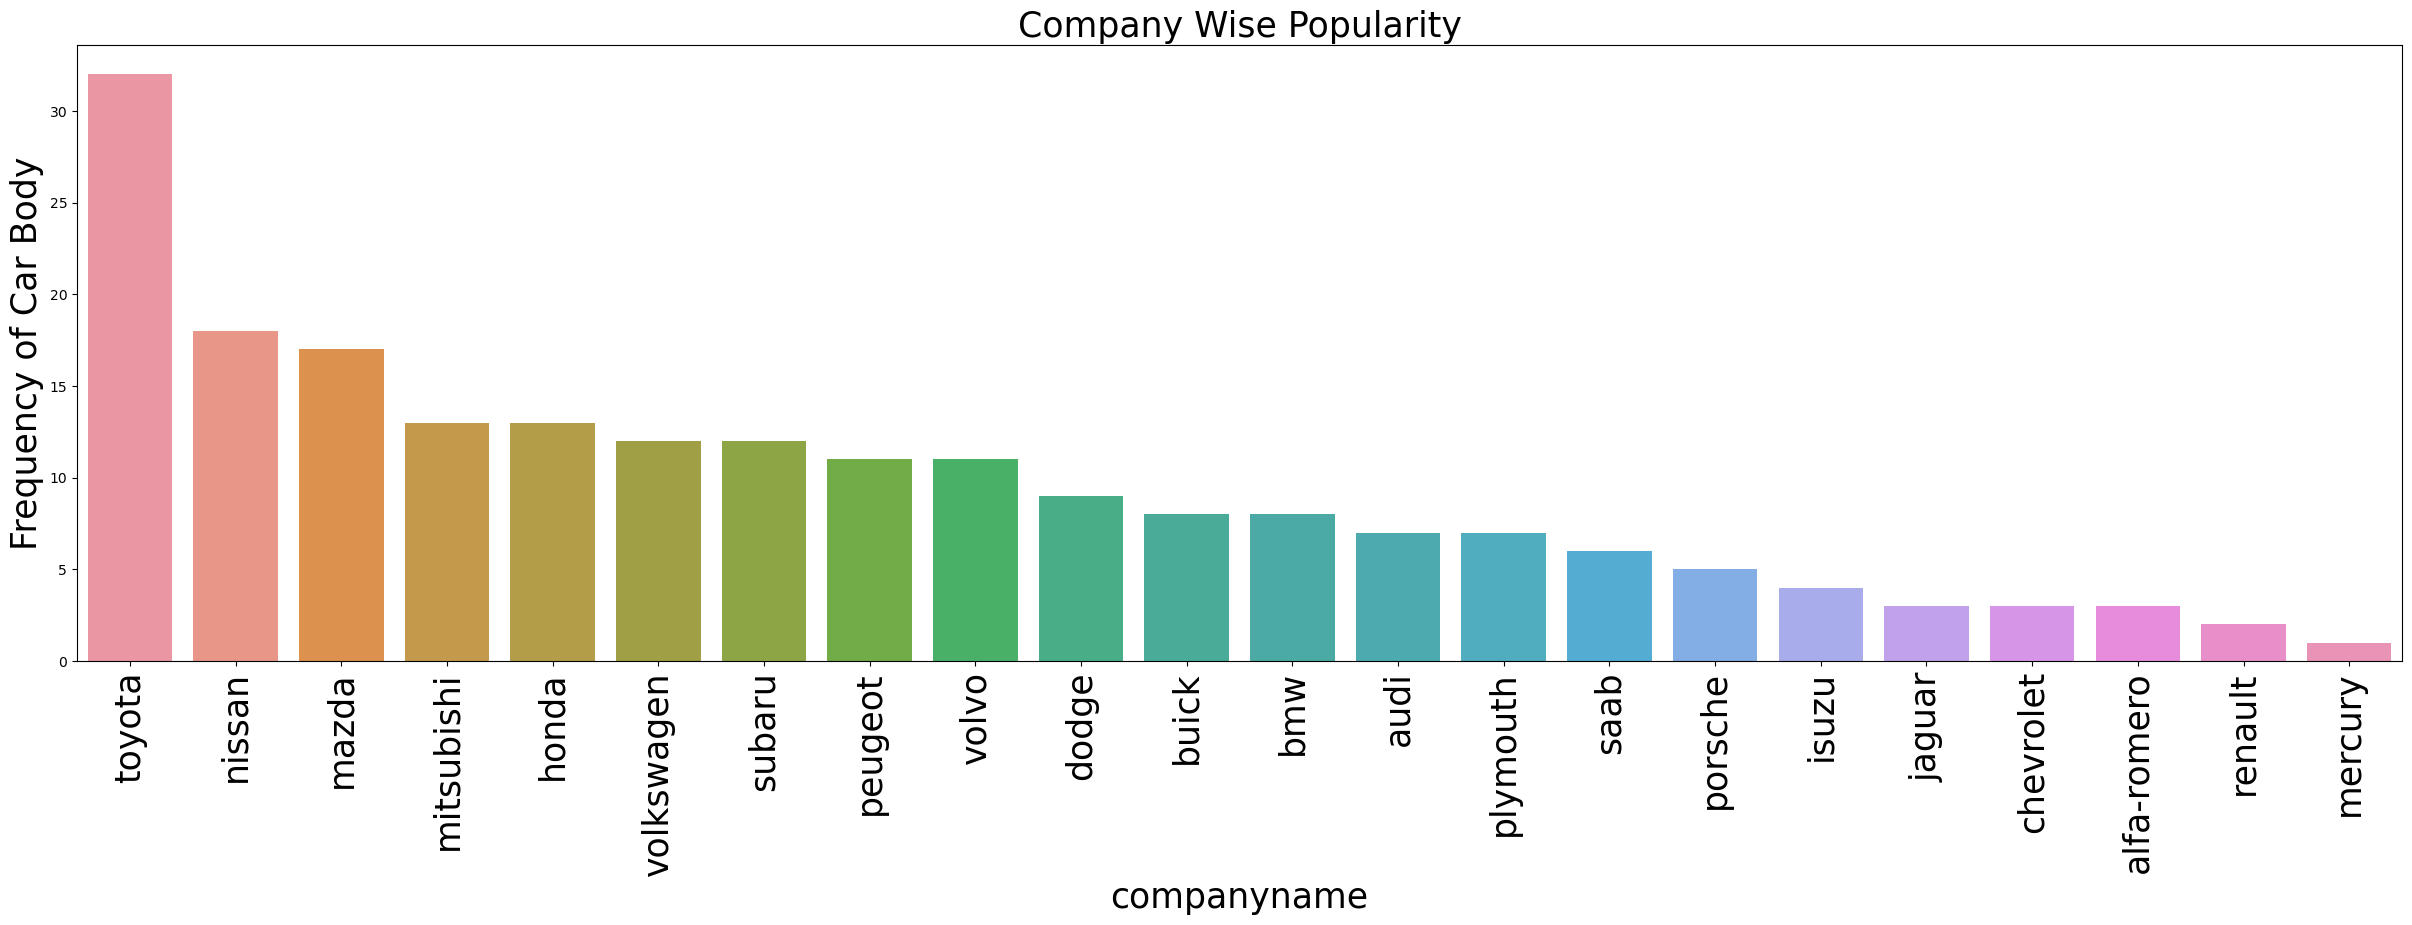

In [47]:
# plotting count of company names

plt.figure(figsize=(30, 8))
plt_1 = sns.countplot(x = 'companyname', data = cars, order = cars['companyname'].value_counts().index)
plt.title('Company Wise Popularity', size = 25)
plt_1.set_xlabel('Car Company', size = 25)
plt_1.set_ylabel('Frequency of Car Body', size = 25)
plt_1.set_xticklabels(plt_1.get_xticklabels(), rotation = 90, size = 25)
plt.show()

#### Inferences:

+ Toyota has most number of rows and seems to be the most popular brand/company.
+ Mercury had the least number of rows and is the least popular company.

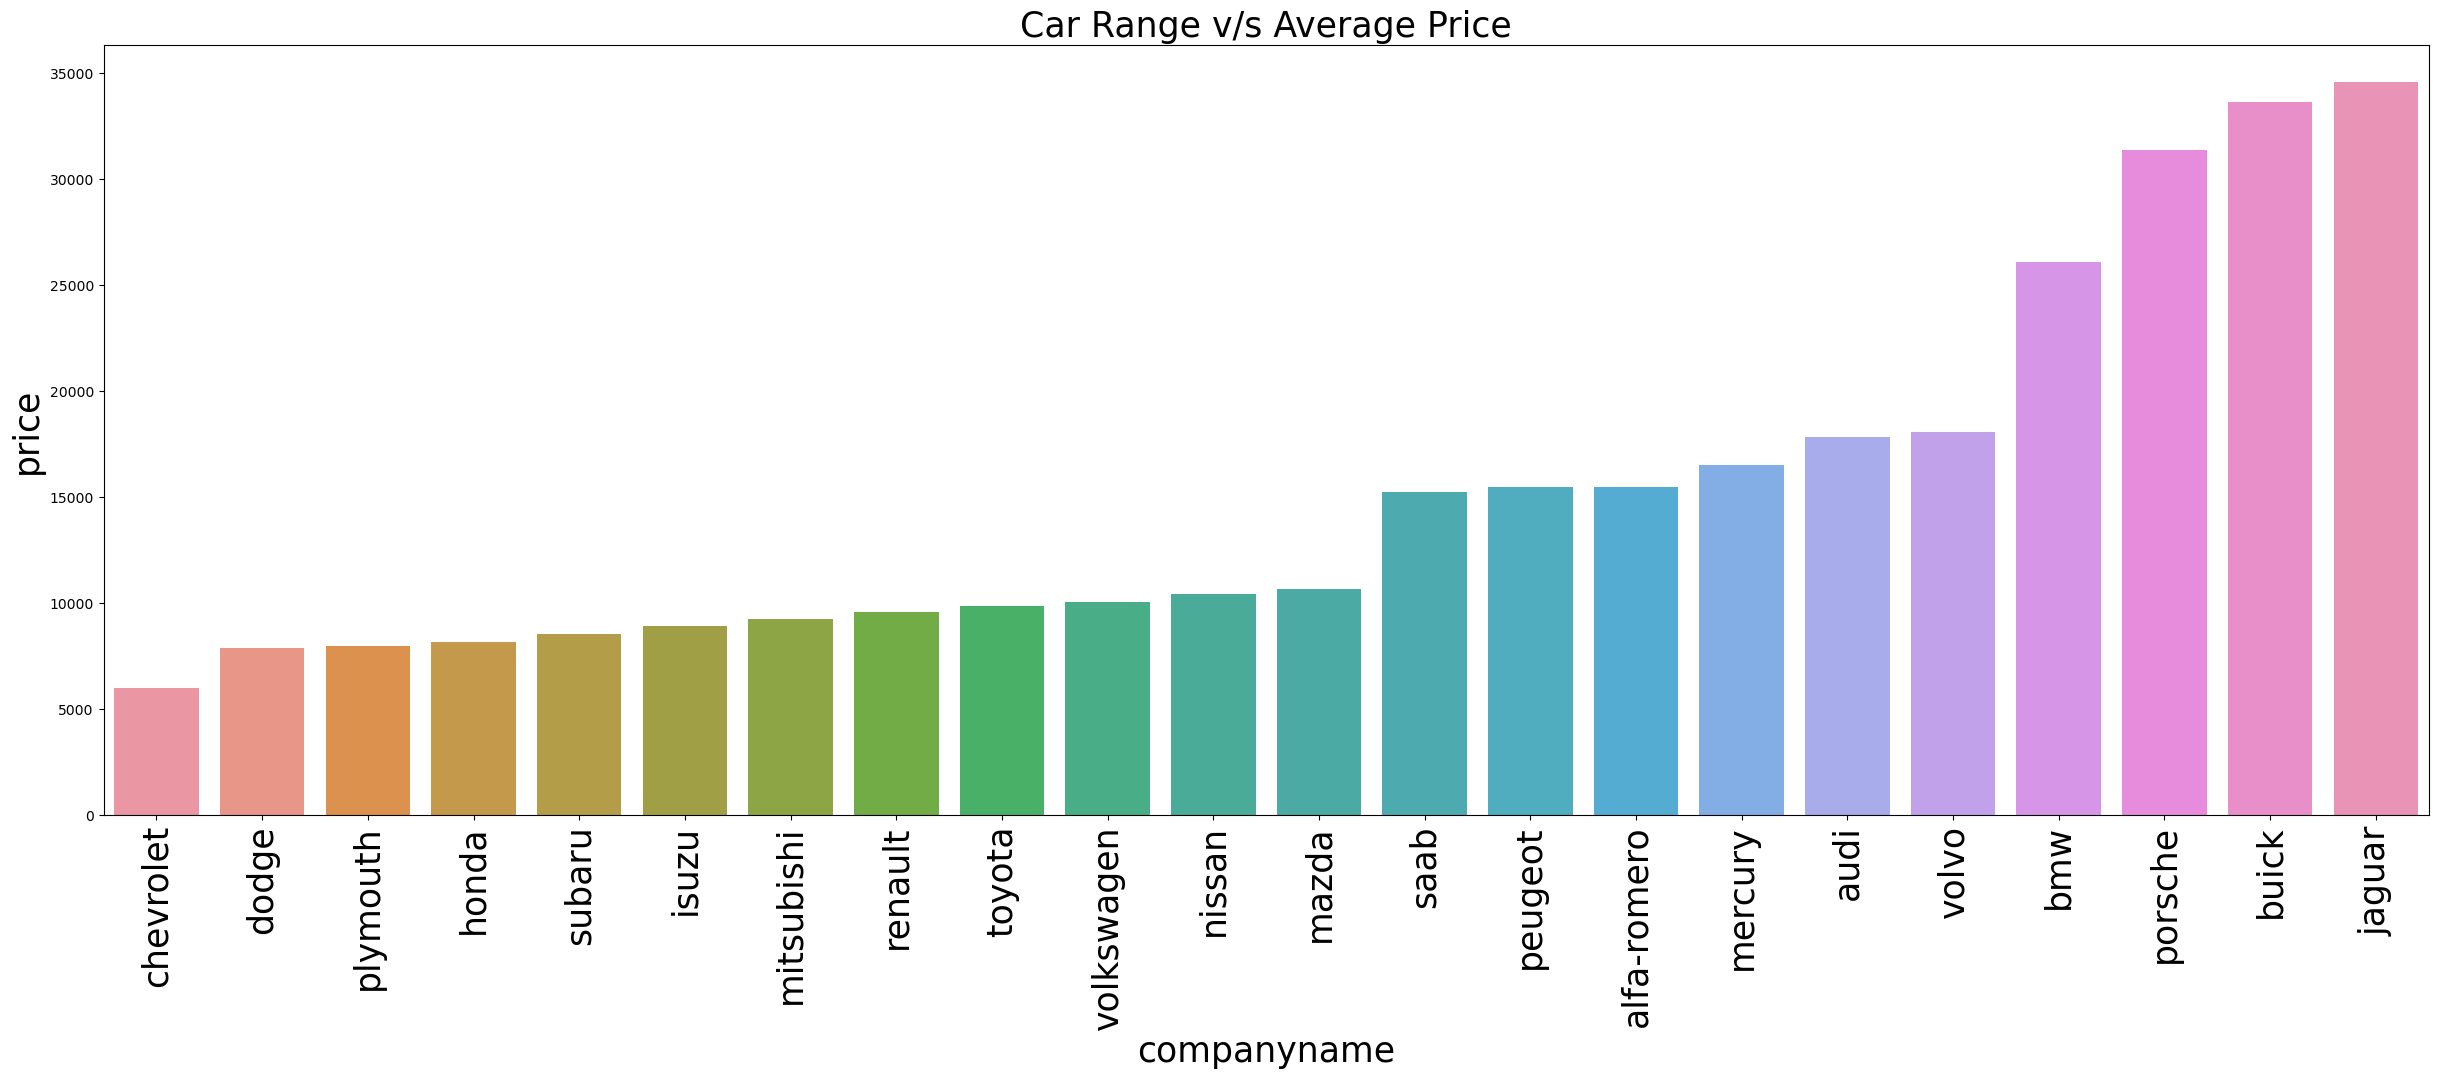

In [52]:
# plotting company wise average price of car

plt.figure(figsize= (30, 10))
df = pd.DataFrame(cars.groupby(['companyname'])['price'].mean().sort_values())
df = df.reset_index(drop = False)
plt1 = sns.barplot(x = "companyname", y = "price", data = df)
plt1.set_title("Car Range v/s Average Price", size = 25)
plt1.set_xlabel("companyname", size = 25)
plt1.set_ylabel("price", size = 25)
plt1.set_xticklabels(plt1.get_xticklabels(), rotation = 90, size = 25)
plt.show()

### INFERENCES:

  + Chevrolet has the cheapest average price amongst all companies.
  + Jaguar has the highest average price.
  + The avg price seems to be dependant on the company name and this is an indicator that we can use this variable in our model because it shows correlation with car price

Now, since the number of companies are too many and it would create a lot of dummy variables, lets divide these companies into segments based on their avg price.

In [55]:
# Binning the Car Companies based on avg prices of each Company.

def replace_values(a, b):
    cars.companyname.replace(a, b, inplace = True)
    
replace_values('chevrolet','Low_End')
replace_values('dodge','Low_End')
replace_values('plymouth','Low_End')
replace_values('honda','Low_End')
replace_values('subaru','Low_End')
replace_values('isuzu','Low_End')
replace_values('mitsubishi','Budget')
replace_values('renault','Budget')
replace_values('toyota','Budget')
replace_values('volkswagen','Budget')
replace_values('nissan','Budget')
replace_values('mazda','Budget')
replace_values('saab','Medium')
replace_values('peugeot','Medium')
replace_values('alfa-romero','Medium')
replace_values('mercury','Medium')
replace_values('audi','Medium')
replace_values('volvo','Medium')
replace_values('bmw','High_End')
replace_values('porsche','High_End')
replace_values('buick','High_End')
replace_values('jaguar','High_End')

cars.rename(columns = {'companyname':'segment'}, inplace = True)
cars.head()

,car_ID,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,Medium,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,Medium,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,Medium,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,Medium,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Let's visualize other categorical variables now, and see if the have any correlation with price.

In [69]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1, var2):
    plt.figure(figsize=(15, 10))   

    plt.subplot(2, 2, 1)
    plt.title('Histogram of ' + var1)
    sns.countplot(data=cars, x=var1, palette=("husl"))
    plt.xlabel(var1)

    plt.subplot(2, 2, 2)
    plt.title(var1 + ' vs Price')
    sns.boxplot(x=cars[var1], y=cars.price, palette=("husl"))

    plt.subplot(2, 2, 3)
    plt.title('Barplot of ' + var2)
    sns.countplot(data=cars, x=var2, palette=("husl"))
    plt.xlabel(var2)

    plt.subplot(2, 2, 4)
    plt.title(var2 + ' vs Price')
    sns.boxplot(x=cars[var2], y=cars.price, palette=("husl"))

    plt.show()

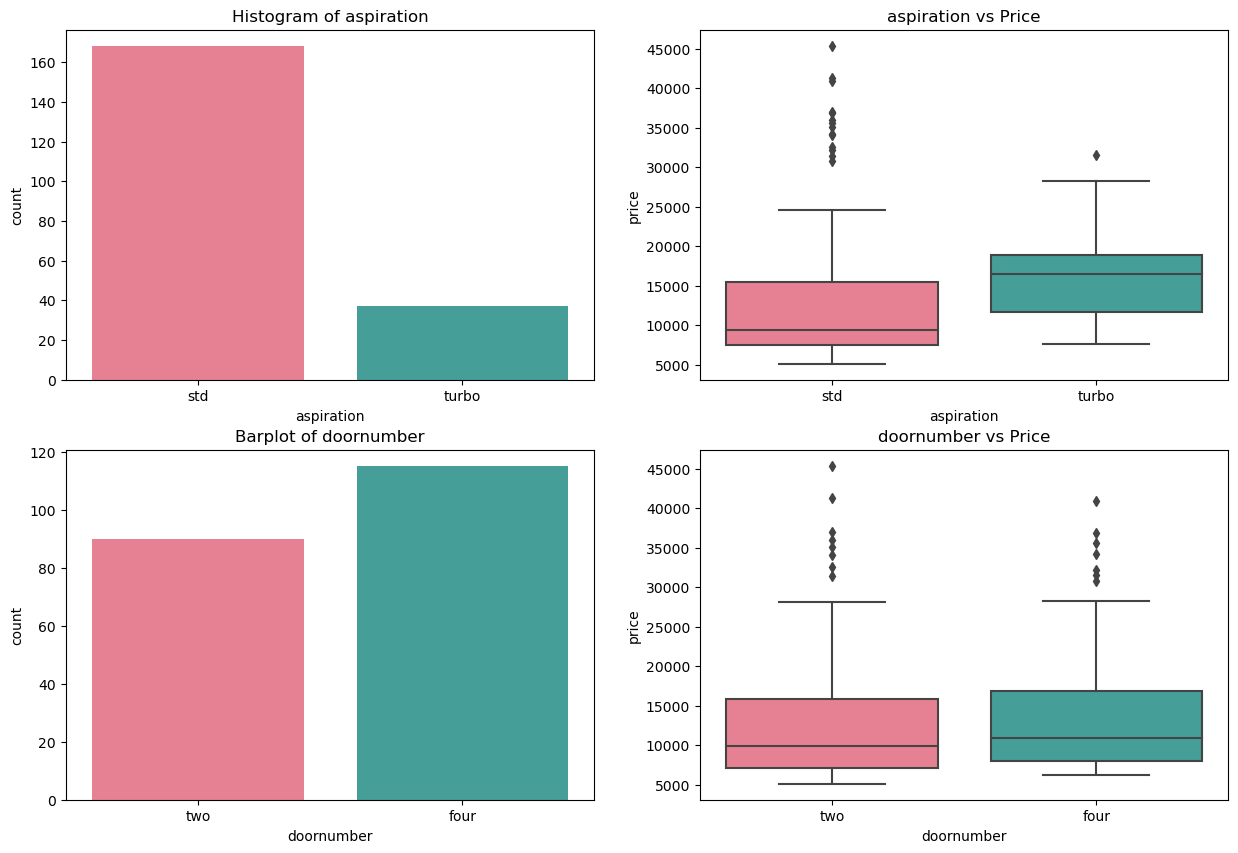

In [70]:
plot_charts('aspiration', 'doornumber')


### INFERENCES

+ Most cars have std aspiration. The box plot shows that cars with turbo aspiration have higher median price
+ Door number shows no relation to car price and hence seems like an insignificant variable right now.

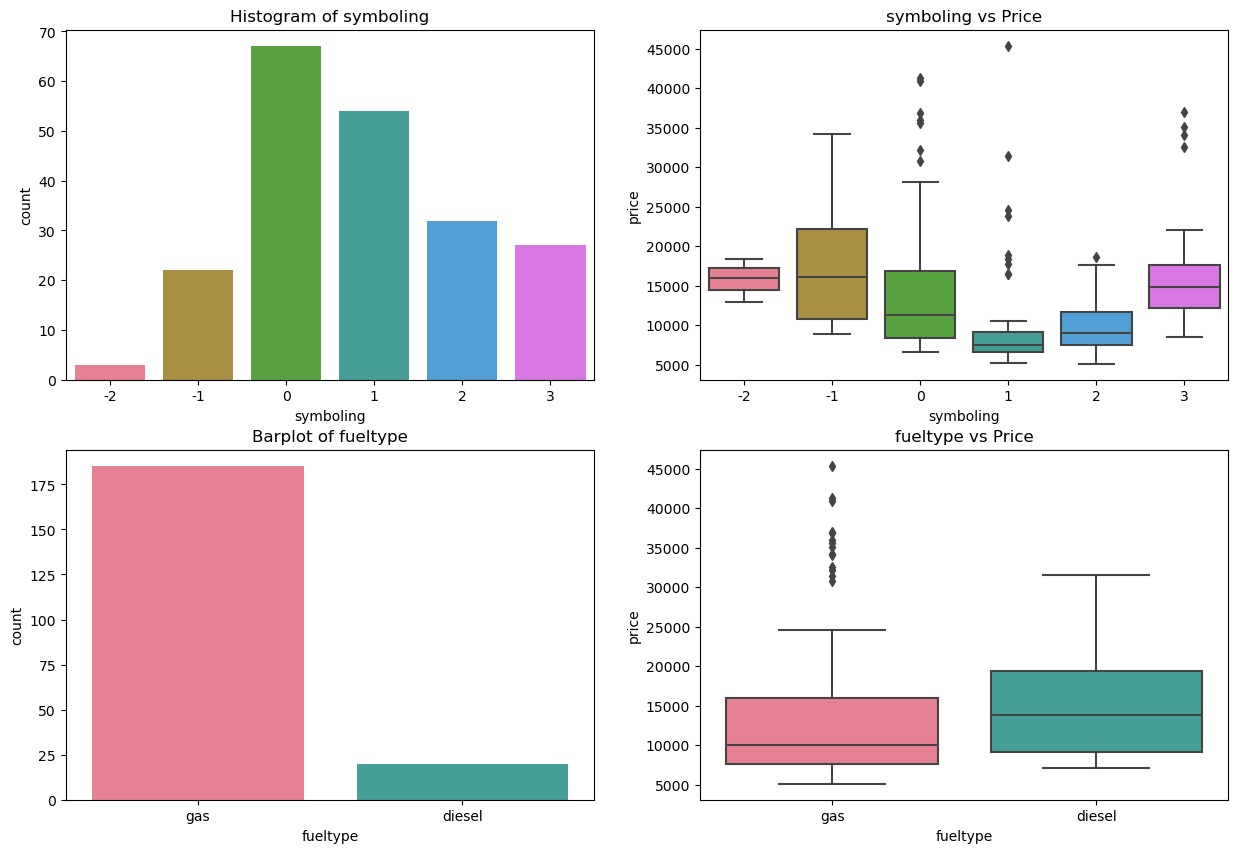

In [71]:
plot_charts('symboling', 'fueltype')

### INFERENCES

+ Most common value for symboling is 0 and 1. The box plot shows us that symboing 1 has the least median price, followed by 0 and 2. symboling values of -1 and -2 have highest median car price.
+ Symboling could be a good predictor variables because we can see a relation in the value of symboling and the price of car.

+ More number of cars have fuel type Gas than diesel.

+ Disel cars have higher median price than gas, although we can see some outliers in the gas boxplot.

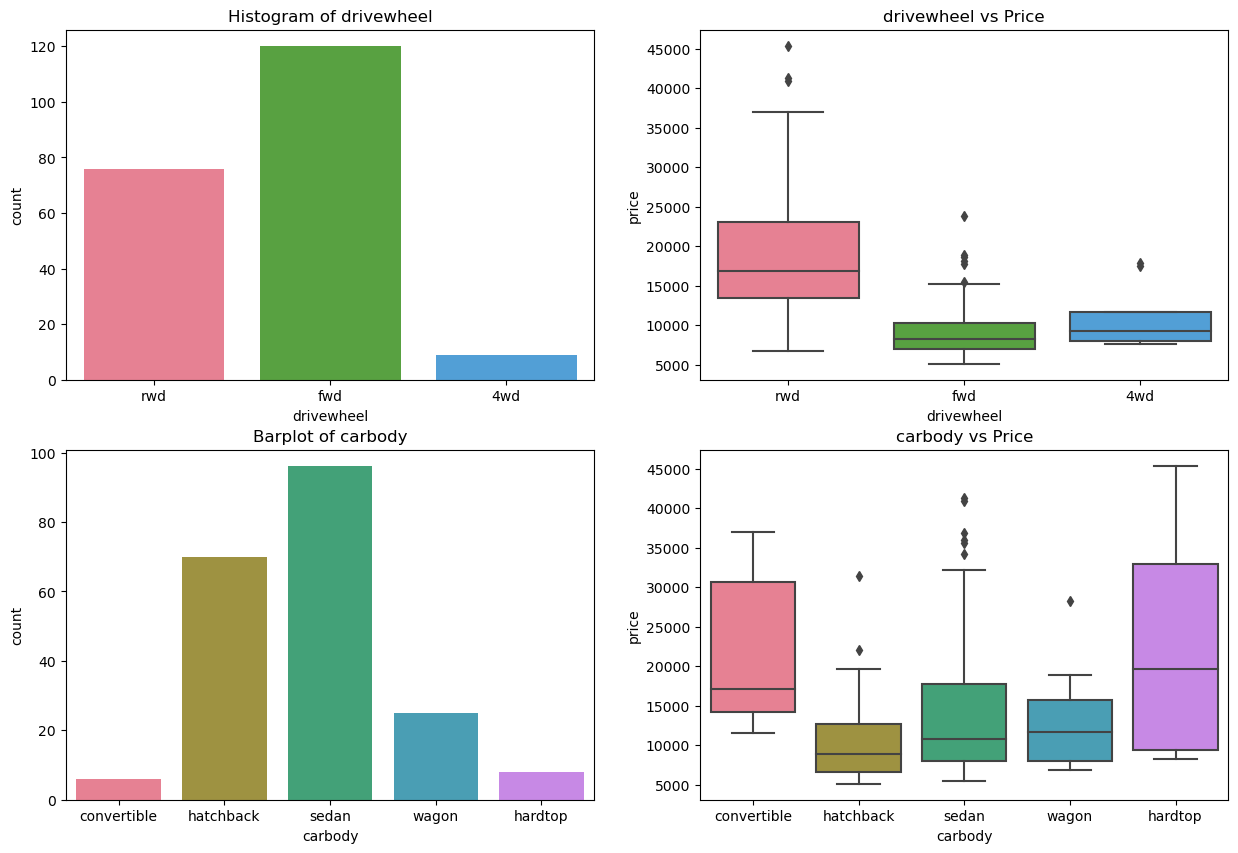

In [72]:
plot_charts('drivewheel', 'carbody')

### INFERENCES

+ Most cars have fwd (`front wheel drive`), followed by rwd (`reverse wheel drive`). The 4wd 4 wheel drive is very uncommon and has the least number of records.
+ cars with rwd have higher median price but their are very few records to make any conclusion on this.

+ sedan followed by hatchback seem to be the most popular carbody.

+ box plot shows that car body convertible and hardtop have higher median values, but very few entries again.

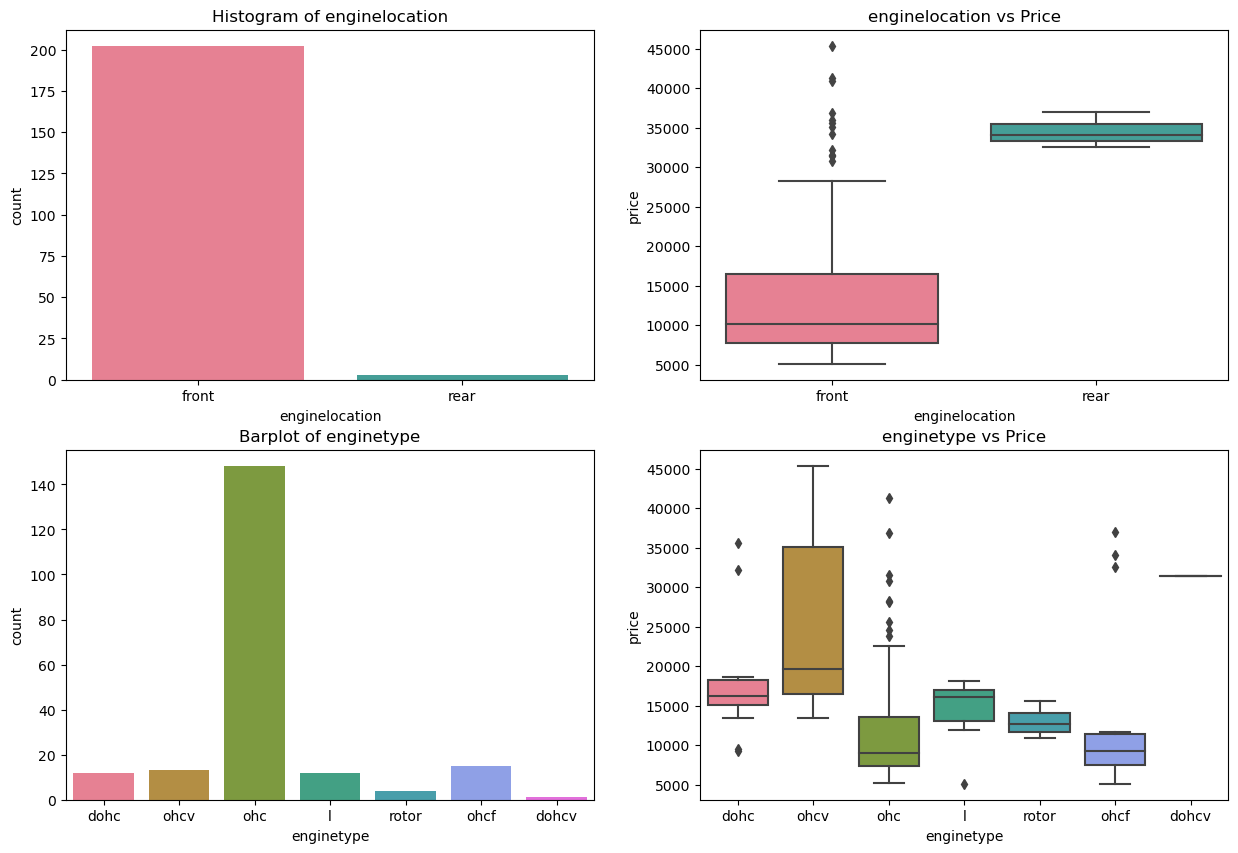

In [73]:
plot_charts('enginelocation', 'enginetype')

### INFERENCES

+ Most cars have engine located at the front and very few cars have engine located at the rear.
+ The boxplot shows that when it is at the rear, the median price is higher than the when it is at the front.
+ ohc engine is preferred over others.
+ ohcv engine has the higherst median value

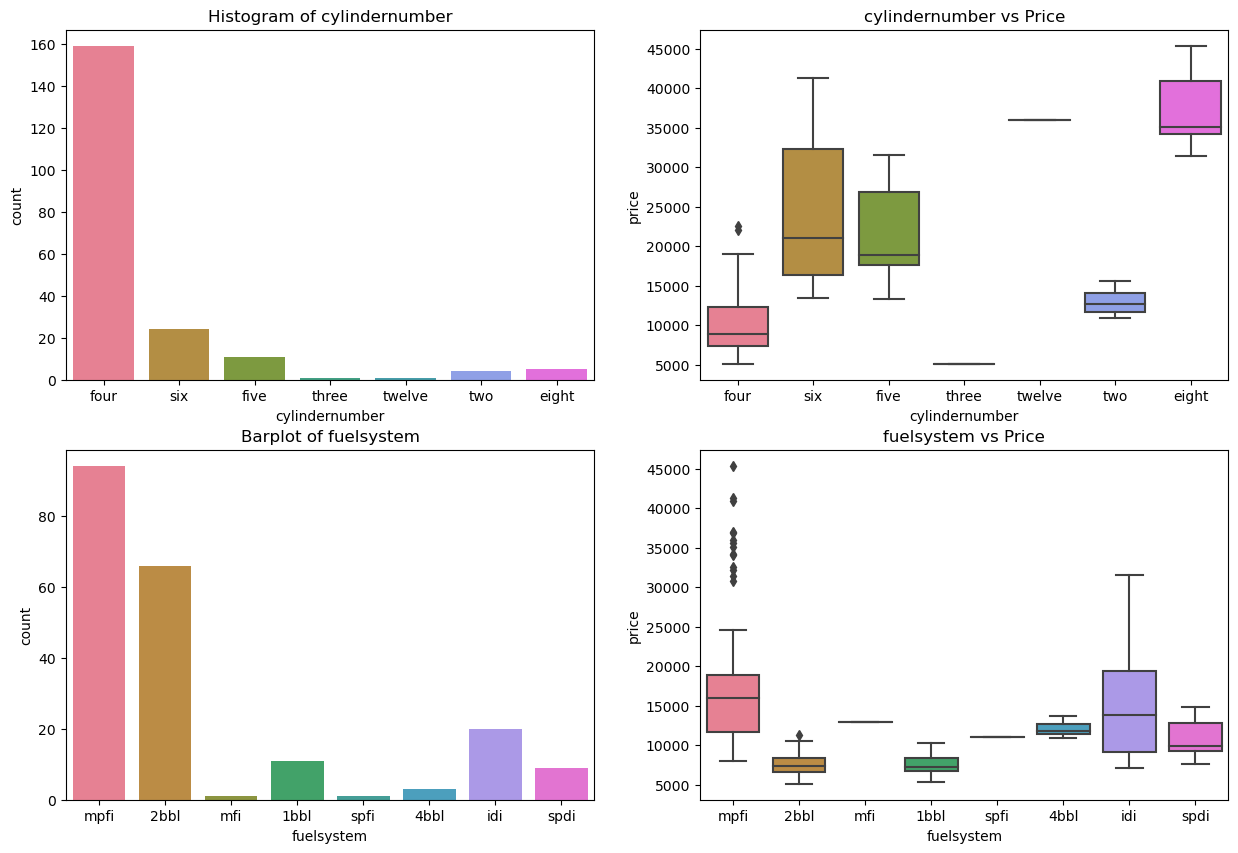

In [74]:
plot_charts('cylindernumber', 'fuelsystem')

### INFERENCES

+ 4 cylinders is the most common number, followed by 4. Cars with four cylinder have the 2nd lowest median value after 3 (very few entries again).

+ mpfi is the most occuring fuelsystem. It has the highest median value and also contains outliers.

In [75]:
cars.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

# Visualizing Numeric Variables


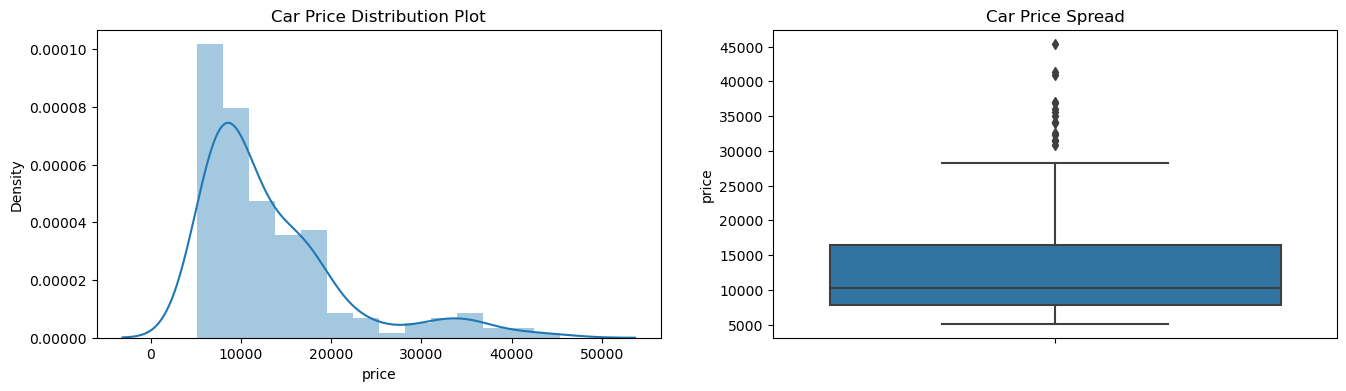

In [81]:
#checking distribution and spread of car price

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

+ The plot is right-skewed, meaning that the most prices in the dataset are low (Below 15,000).
+ There is a significant difference between the mean and the median of the price distribution.
+ There is a high variance in the car prices, data points are far spread out from the mean.

In [82]:
# checking numeric columns

cars.select_dtypes(include=['float64','int64']).columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

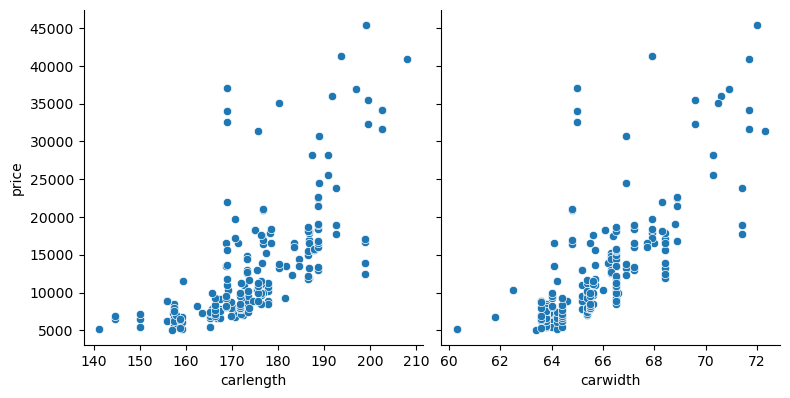

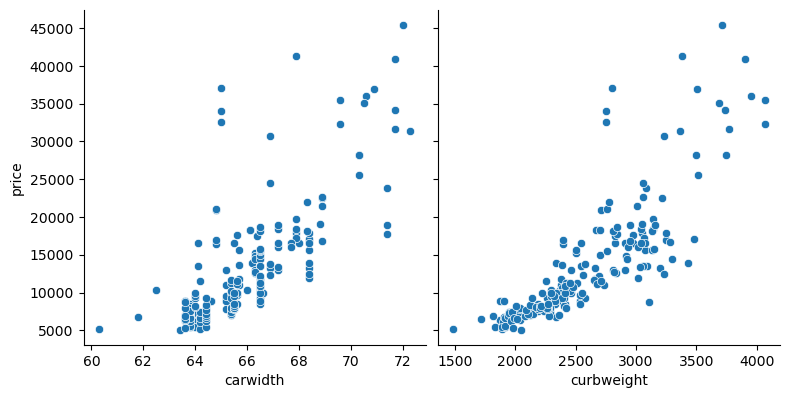

In [83]:
#function to plot scatter plot numeric variables with price

def pp(x,y):
    sns.pairplot(cars, x_vars=[x,y], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('carlength', 'carwidth')
pp('carwidth', 'curbweight')

+ Except Car Height, all variables show a positive correlation with respect to price.


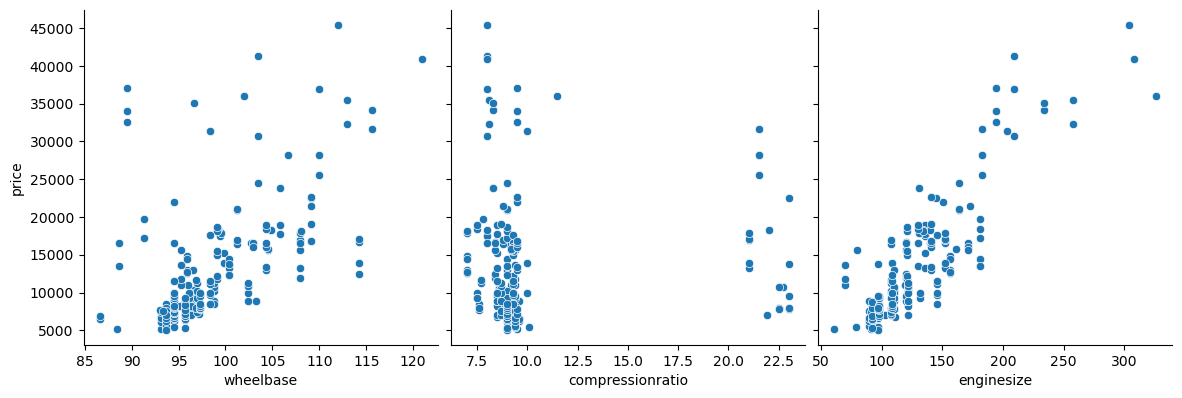

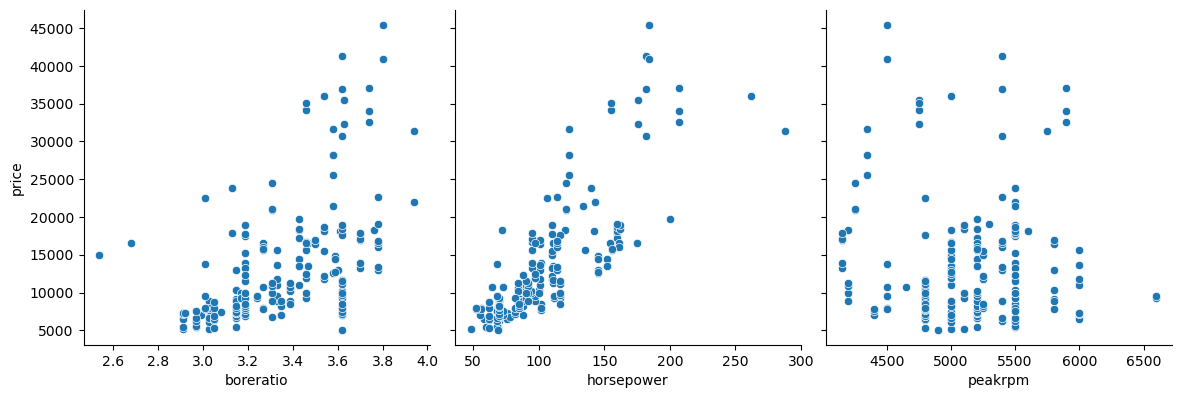

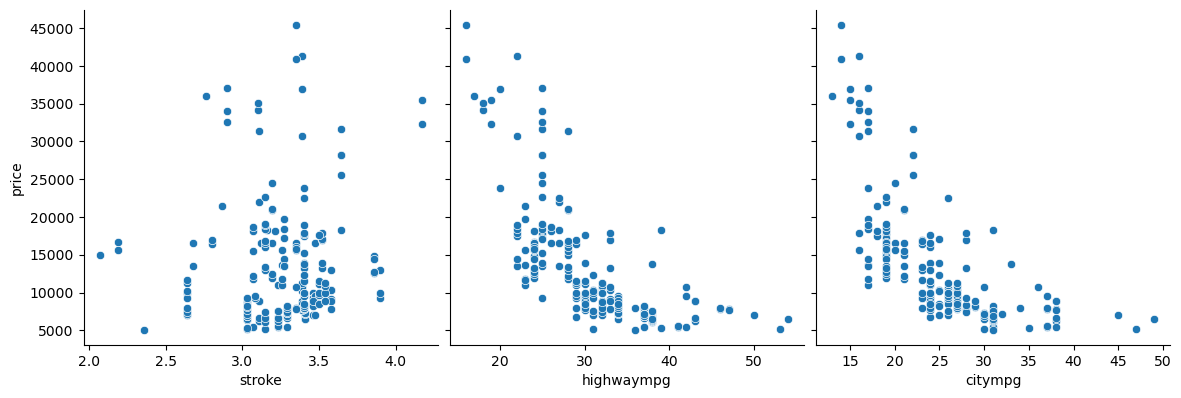

In [84]:
#function to plot scatter plot numeric variables with price

def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',height=4, aspect=1, kind='scatter')
    plt.show()

pp('wheelbase', 'compressionratio', 'enginesize')
pp('boreratio', 'horsepower', 'peakrpm')
pp('stroke', 'highwaympg', 'citympg')

+ Compression Ratio, Stoke and Peakrpm show no obvious correlation b/w them and car price.
+ Boreratio shows some positive correlation with a lot of variance.
+ Citympg and highwaympg are negatively correlated to the price.

In [85]:
#converting cylinder number to numeric and replacing values

def replace_values(a,b):
    cars.cylindernumber.replace(a,b,inplace=True)

replace_values('four','4')
replace_values('six','6')
replace_values('five','5')
replace_values('three','3')
replace_values('twelve','12')
replace_values('two','2')
replace_values('eight','8')

cars.cylindernumber=cars.cylindernumber.astype('int')

In [86]:
cars.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [88]:
# Converting symboling to categorical because the numeric values imply weight

def replace_values(a,b):
    cars.symboling.replace(a,b,inplace=True)

replace_values(3,'Very_Risky')
replace_values(2,'Moderately_Risky')
replace_values(1,'Neutral')
replace_values(0,'Safe')
replace_values(-1,'Moderately_Safe')
replace_values(-2,'Very_Safe')

In [89]:
# Converting variables with 2 values to 1 and 0

cars['fueltype'] = cars['fueltype'].map({'gas': 1, 'diesel': 0})
cars['aspiration'] = cars['aspiration'].map({'std': 1, 'turbo': 0})
cars['doornumber'] = cars['doornumber'].map({'two': 1, 'four': 0})
cars['enginelocation'] = cars['enginelocation'].map({'front': 1, 'rear': 0})

In [90]:
# Dropping card_Id because it has all unique values

cars.drop(['car_ID'], axis =1, inplace = True)

In [91]:
# Numeric variables

num_vars=cars.select_dtypes(include=['float64','int64']).columns

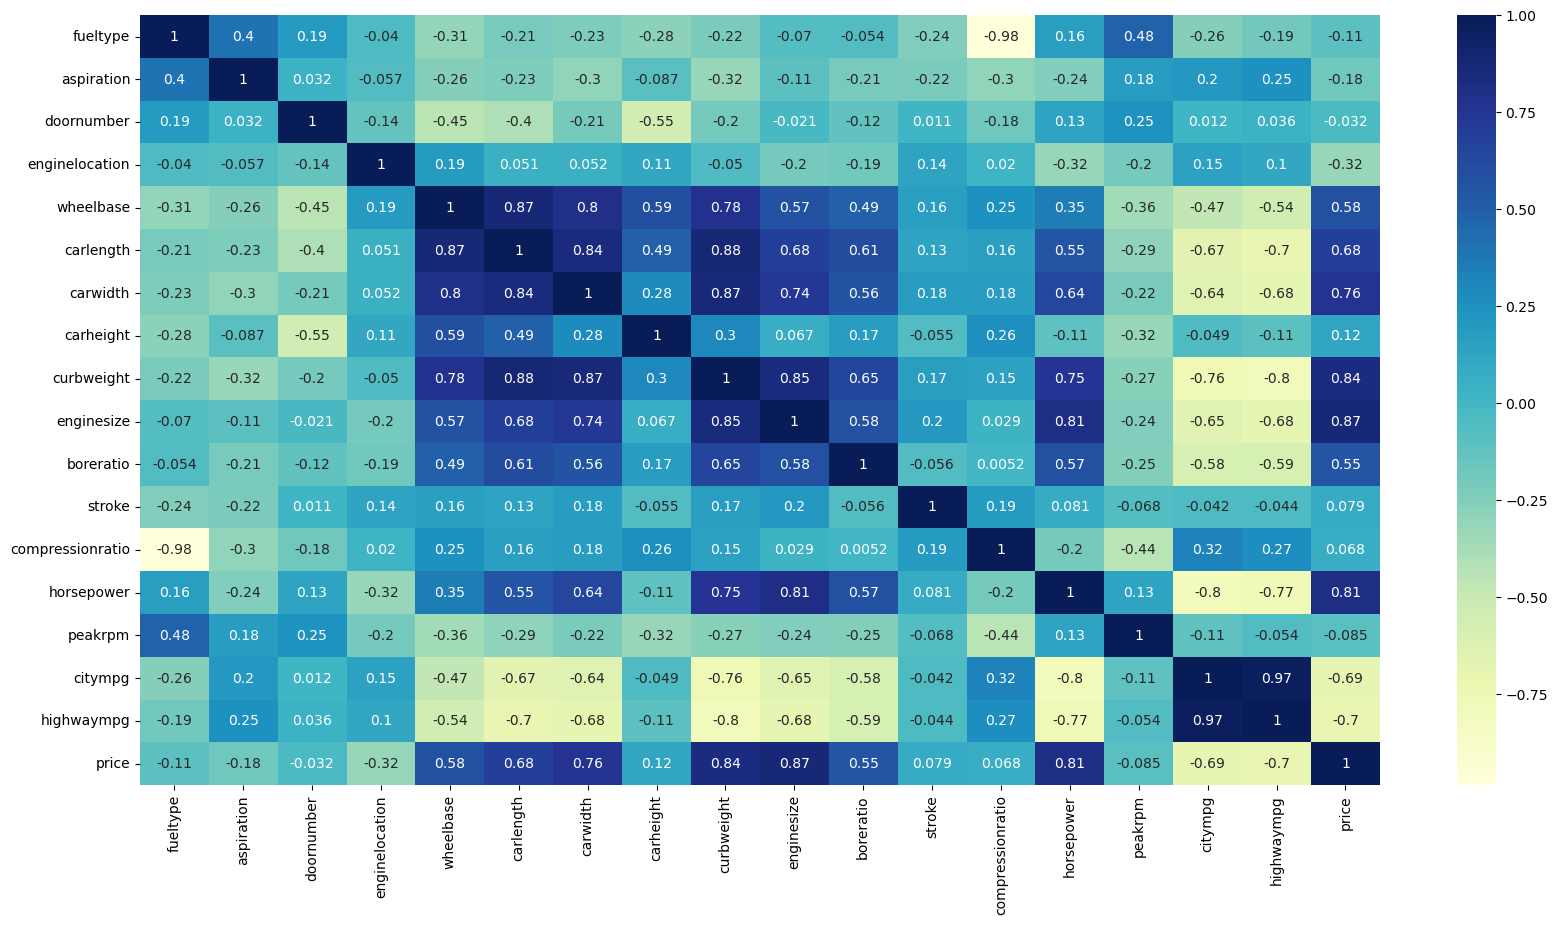

In [93]:
# plotting heatmap to check correlation amongst variables

plt.figure(figsize = (20,10))  
sns.heatmap(cars[num_vars].corr(),cmap="YlGnBu",annot = True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

+ Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

+ Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

+ Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [94]:
# dropping variables which are highly correlated to other variables

cars.drop(['compressionratio','carwidth','curbweight','wheelbase','citympg'], axis =1, inplace = True)

In [95]:
cars.head()

,symboling,segment,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,highwaympg,price
0,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,13495.0
1,Very_Risky,Medium,1,1,1,convertible,rwd,1,168.8,48.8,dohc,4,130,mpfi,3.47,2.68,111,5000,27,16500.0
2,Neutral,Medium,1,1,1,hatchback,rwd,1,171.2,52.4,ohcv,6,152,mpfi,2.68,3.47,154,5000,26,16500.0
3,Moderately_Risky,Medium,1,1,0,sedan,fwd,1,176.6,54.3,ohc,4,109,mpfi,3.19,3.40,102,5500,30,13950.0
4,Moderately_Risky,Medium,1,1,0,sedan,4wd,1,176.6,54.3,ohc,5,136,mpfi,3.19,3.40,115,5500,22,17450.0


In [96]:
# getting dummies for categorical variables

df = pd.get_dummies(cars)
df.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,168.8,48.8,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,171.2,52.4,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,176.6,54.3,4,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,176.6,54.3,5,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [97]:
# checking column names for dummy variables

df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'carlength',
       'carheight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'highwaympg', 'price',
       'symboling_Moderately_Risky', 'symboling_Moderately_Safe',
       'symboling_Neutral', 'symboling_Safe', 'symboling_Very_Risky',
       'symboling_Very_Safe', 'segment_Budget', 'segment_High_End',
       'segment_Low_End', 'segment_Medium', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

# DIVIDING INTO TRAIN AND TEST

In [98]:
# importing necessary libraries and functions

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

# SCALING NUMERIC VARIABLES


In [99]:
# for scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,cylindernumber,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,1.0,1.0,0.0,1.0,0.426016,0.265487,4,0.139623,0.230159,0.525253,...,0,0,0,1,0,0,0,0,0,0
125,1.0,1.0,1.0,1.0,0.452033,0.212389,4,0.339623,1.000000,0.464646,...,0,0,0,0,0,0,0,1,0,0
166,1.0,1.0,1.0,1.0,0.448780,0.424779,4,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1.0,1.0,1.0,0.450407,0.088496,4,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,1,0,0
199,1.0,0.0,0.0,1.0,0.775610,0.858407,4,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,1,0,0


# Dividing into X and Y sets for the Model Building


In [101]:
#dividing into x and y sets where y has the variable we have to predict

y_train = df_train.pop('price')
X_train = df_train

In [102]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [105]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 28),
 ('aspiration', True, 1),
 ('doornumber', False, 22),
 ('enginelocation', True, 1),
 ('carlength', True, 1),
 ('carheight', False, 13),
 ('cylindernumber', False, 10),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 8),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('highwaympg', False, 2),
 ('symboling_Moderately_Risky', False, 25),
 ('symboling_Moderately_Safe', False, 16),
 ('symboling_Neutral', False, 27),
 ('symboling_Safe', False, 26),
 ('symboling_Very_Risky', False, 24),
 ('symboling_Very_Safe', False, 6),
 ('segment_Budget', False, 3),
 ('segment_High_End', True, 1),
 ('segment_Low_End', False, 4),
 ('segment_Medium', False, 33),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 23),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 17),
 ('drivewheel_4wd', False, 34),
 ('drivewheel_fwd', False, 15),
 ('drivewheel_rwd', False, 21),
 ('enginetype_dohc', False, 11),
 ('eng

In [106]:
#checking RFE columns
col = X_train.columns[rfe.support_]
col

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'boreratio',
       'horsepower', 'segment_High_End', 'carbody_convertible',
       'enginetype_rotor', 'fuelsystem_spdi'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics¶


In [107]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [108]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [109]:
# function for checking VIF

def checkVIF(X):
    vif = pd.DataFrame()
    vif['variable'] = X.columns    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [110]:
# building MODEL #1

lm = sm.OLS(y_train,X_train_rfe).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           7.38e-70
Time:                        23:12:54   Log-Likelihood:                 203.94
No. Observations:                 143   AIC:                            -385.9
Df Residuals:                     132   BIC:                            -353.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1915    

In [111]:
#dropping constant to calculate VIF

X_train_rfe.drop('const', axis = 1, inplace=True)

In [112]:
#checking VIF

checkVIF(X_train_rfe)

,variable,VIF
3,enginesize,25.34
2,carlength,22.51
1,enginelocation,20.55
4,boreratio,11.74
5,horsepower,11.41
0,aspiration,7.39
6,segment_High_End,2.35
9,fuelsystem_spdi,1.40
8,enginetype_rotor,1.37
7,carbody_convertible,1.10


In [114]:
# dropping boreratio because it has the highest p-value and also high VIF. It is also something which is difficult to 
# explain to management

X_train_new = X_train_rfe.drop(["boreratio"], axis = 1)

In [115]:
#building MODEL #2 after dropping boreratio

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.20e-69
Time:                        23:14:34   Log-Likelihood:                 199.91
No. Observations:                 143   AIC:                            -379.8
Df Residuals:                     133   BIC:                            -350.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1483    

In [116]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [117]:
# dropping enginelocation because it has the highest p-value and also high VIF. it has very few values for rear as 
# we saw earlier

X_train_new.drop(["enginelocation"], axis=1, inplace=True)

In [118]:
#building MODEL #3 after dropping enginelocation

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           5.53e-69
Time:                        23:15:27   Log-Likelihood:                 196.05
No. Observations:                 143   AIC:                            -374.1
Df Residuals:                     134   BIC:                            -347.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0284    

In [119]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [120]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
2,enginesize,25.01
1,carlength,11.10
3,horsepower,11.03
0,aspiration,3.25
4,segment_High_End,2.25
6,enginetype_rotor,1.37
7,fuelsystem_spdi,1.15
5,carbody_convertible,1.08


In [121]:
# dropping horsepower because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["horsepower"], axis=1, inplace=True)

In [122]:
#building MODEL #4 after dropping horsepower

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     181.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           2.32e-65
Time:                        23:16:22   Log-Likelihood:                 184.28
No. Observations:                 143   AIC:                            -352.6
Df Residuals:                     135   BIC:                            -328.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0081    

In [123]:
#dropping constant to calculate VIF

X_train_new.drop('const', axis=1, inplace=True)

In [124]:
#checking VIF

checkVIF(X_train_new)

,variable,VIF
2,enginesize,12.81
1,carlength,11.07
0,aspiration,3.19
3,segment_High_End,2.24
5,enginetype_rotor,1.13
6,fuelsystem_spdi,1.11
4,carbody_convertible,1.08


In [125]:
#dopping carlength because it has the high VIF and exhibits multicollinearity. 
#it is highly correlated to engine size and can be dropped.

X_train_new.drop(["carlength"], axis=1, inplace=True)

In [126]:
#building MODEL #5 after dropping carlength

X_train_new = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sun, 17 Sep 2023   Prob (F-statistic):           7.44e-62
Time:                        23:17:09   Log-Likelihood:                 172.89
No. Observations:                 143   AIC:                            -331.8
Df Residuals:                     136   BIC:                            -311.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0718    

In [127]:
#dropping constant to calculate VIF

X_train_vif=X_train_new.drop('const', axis=1)

#checking VIF

checkVIF(X_train_vif)

,variable,VIF
1,enginesize,4.18
0,aspiration,2.72
2,segment_High_End,1.94
5,fuelsystem_spdi,1.11
4,enginetype_rotor,1.07
3,carbody_convertible,1.05


# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [128]:
#calculating price on train set using the model built

y_train_price = lm.predict(X_train_new)


Text(0.5, 0, 'Errors')

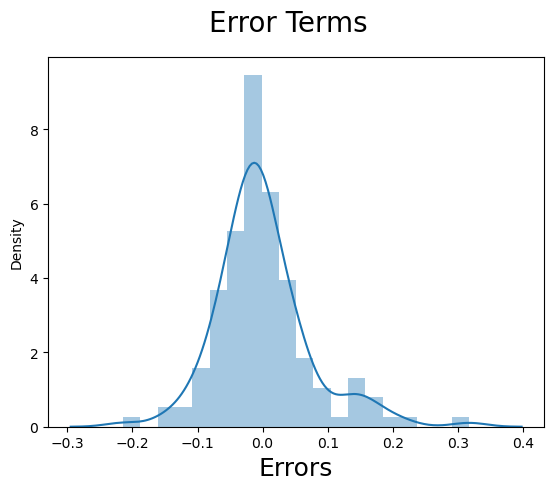

In [129]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Text(0, 0.5, 'y_train_price')

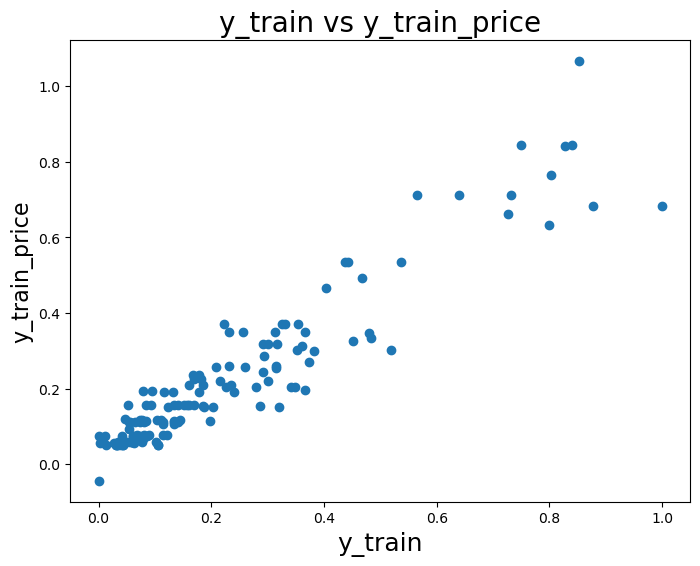

In [130]:
# Plotting y_train and y_train_price to understand the residuals.

plt.figure(figsize = (8,6))
plt.scatter(y_train,y_train_price)
plt.title('y_train vs y_train_price', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_price', fontsize=16)                          # Y-label

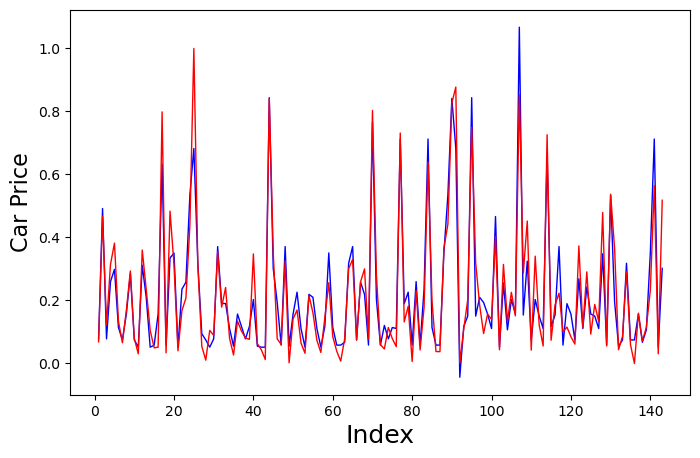

In [131]:
# Actual vs Predicted for TRAIN SET

plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
d = [i for i in range(1,144,1)]
plt.plot(c, y_train_price, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_train, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.show()

Text(0, 0.5, 'ytest-ypred')

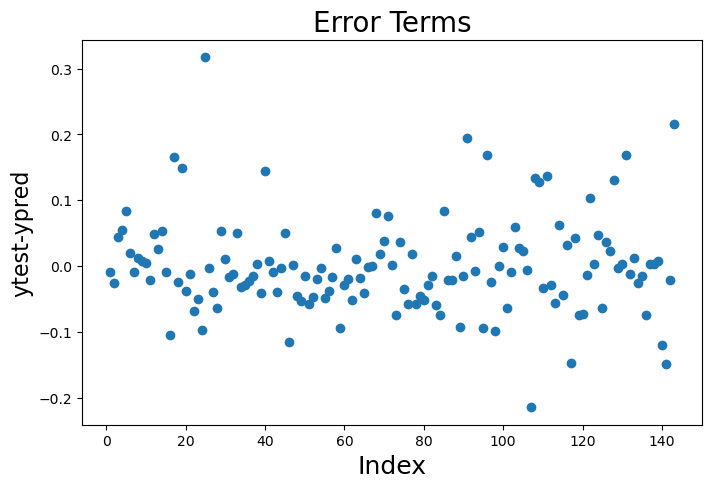

In [132]:
# Error terms for TRAIN SET
plt.figure(figsize = (8,5))
c = [i for i in range(1,144,1)]
plt.scatter(c,y_train-y_train_price)

plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

# Making Predictions¶


In [133]:
# Applying the scaling on the test sets

num_vars = ['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'enginesize','horsepower', 
            'peakrpm', 'highwaympg', 'carlength', 'carheight', 'boreratio', 'stroke', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])


# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test
X_train_new.drop('const', axis=1, inplace=True)

In [134]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [135]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Model Evaluation

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8772766234421763

Text(0, 0.5, 'y_pred')

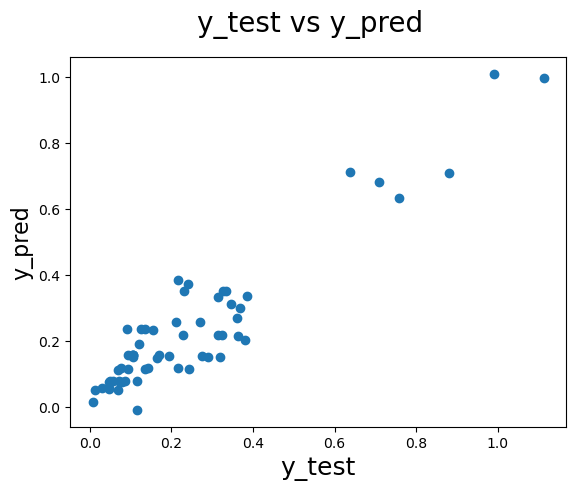

In [137]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)                          

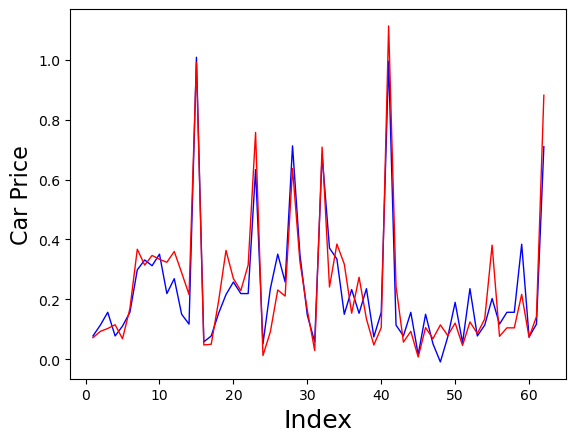

In [138]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
d = [i for i in range(1,63,1)]
plt.plot(c, y_pred, color="blue", linewidth=1, linestyle="-")     #Plotting Actual
plt.plot(d, y_test, color="red",  linewidth=1, linestyle="-")  #Plotting predicted
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  
plt.show()

Text(0, 0.5, 'ytest-ypred')

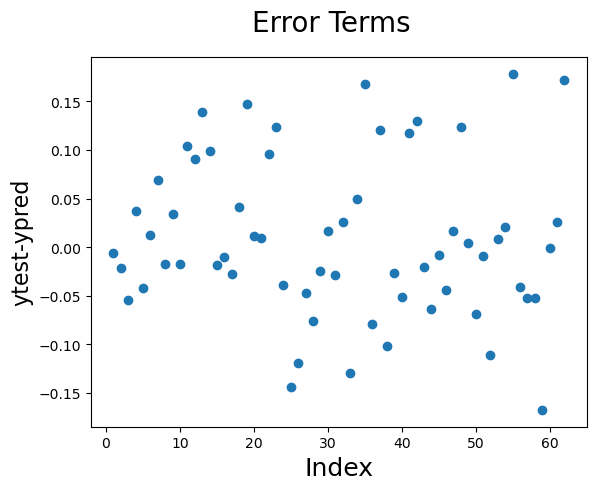

In [139]:
# Error terms

fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.scatter(c,y_test-y_pred)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [140]:
#RMSE score for test set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.08098980094102318


In [141]:
#RMSE score for train set

import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_price)))

RMSE : 0.07222658461747392


In [142]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8772766234421763

In [143]:
r2_score(y_train, y_train_price)

0.8870686436956071

### Conclusion :
 1. The model for the most part is capturing the linear association well and overall looks good
 2. The R square and Adjusted R square values in the above Car Price Model for trained data set are almost very close to each other i.e., 92.1 % and 91.5 % respectively. This indicates that none of the parameters in the Car Price Model are reduntant.
 3. Variance Inflation Factor of all variables is < 3.
 4. The R-Squared Score on the test dataset is 88.63 %, which is a good value.
 5. The following variables are significant for predicting the car prices in US Market :

  - Rear (Engine Location)
  - Dohcv (Engine Type)
  - CurbWeight
  - Five(Cylinder)
  - Car Make : BMW, Buick, Porsche, Jaguar, Audi